### Fonksyonlar

In [ ]:
def load_and_prep_image(filename, img_shape=64, colour_channel="grayscale"):
  #Read image
  img = tf.io.read_file(filename)
  #Decode the read file
  img= tf.image.decode_image(img)
  #Resize the image
  img= tf.image.resize(img,size=[img_shape,img_shape])
  #Scaling the image
  img=tf.image.rgb_to_grayscale(img, name=None)
  img= img/255.
  return img

In [ ]:
def pred_and_plot(model, filename, class_names):
  
  #import the target image and pre process it
  img= load_and_prep_image(filename)

  #make predictions
  pred = model.predict(tf.expand_dims(img,axis=0))

  #Get the predicted class
  pred_class= class_names[int(tf.round(pred.argmax()))]
  #plot the image and predicted class
 ##### ? plt.title(f"Prediction: {pred_class}")
  plt.imshow(img)
  plt.axis("off")
  print(pred_class, pred)

In [ ]:
def plot_loss_curves(history):
  
  loss= history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epo= range(len(history.history["loss"]))
  

  plt.plot(epo, loss, label="Training_Loss")
  plt.plot(epo, val_loss, label="val_Loss")
  plt.title=("Loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epo, accuracy, label="Training_accuracy")
  plt.plot(epo, val_accuracy, label="val_accuracy")
  plt.title=("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [ ]:
# İmage Visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
    #Setup Target Directory
    target_folder= target_dir+"/"+target_class
    
    #Get Random İmage
    random_image= random.sample(os.listdir(target_folder),1)
    print(random_image)
    #Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    
    print(f"Image shape: {img.shape}")
    
    return img

In [ ]:
#THE CONFUSION MATRIX
#-------------------------------------------------
import itertools
from sklearn.metrics import confusion_matrix

def PrettyConfusionMatrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15 ):

    cm=confusion_matrix(y_true,y_pred)
    cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
    n_classes=cm.shape[0]

    #Making prettify
    fig, ax= plt.subplots(figsize=figsize)
    # Create matrix Plot
    cax=ax.matshow(cm,cmap=plt.cm.Blues)
    fig.colorbar(cax)

    #Create clases

    if classes:
        labels=classes
    else:
        labels=np.arange(cm.shape[0])

    #axis labeling
    ax.set(title="Confusion Matrix",
          xlabel="Predicted Label",
          ylabel="True Label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)
    #Set x axis to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    #Adjust  label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size+10)
    #set thresh hold for different Colours
    threshold= (cm.max()+cm.min())/2

    #Plot the text on each cell
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment= "center",
                color="white"  if cm[i,j]>threshold else "black",
                size=15)


### 1. lOADING IMAGES

In [ ]:
import zipfile
zip_ref= zipfile.ZipFile("faceDetectedImages.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os 
#walkthrough all classes
for dirpath,dirnames , filenames in os.walk("faceDetectedImages"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'faceDetectedImages'.
There are 7 directories and 0 images in 'faceDetectedImages/test'.
There are 0 directories and 20 images in 'faceDetectedImages/test/fear'.
There are 0 directories and 20 images in 'faceDetectedImages/test/happy'.
There are 0 directories and 24 images in 'faceDetectedImages/test/sad'.
There are 0 directories and 20 images in 'faceDetectedImages/test/surprised'.
There are 0 directories and 20 images in 'faceDetectedImages/test/angry'.
There are 0 directories and 20 images in 'faceDetectedImages/test/neutral'.
There are 0 directories and 20 images in 'faceDetectedImages/test/disgust'.
There are 7 directories and 0 images in 'faceDetectedImages/train'.
There are 0 directories and 103 images in 'faceDetectedImages/train/fear'.
There are 0 directories and 102 images in 'faceDetectedImages/train/happy'.
There are 0 directories and 107 images in 'faceDetectedImages/train/sad'.
There are 0 directories and 100 images in 'faceDetected

In [ ]:
#Setup train and test directories
train_dir="faceDetectedImages/train/"
test_dir="faceDetectedImages/test/"

In [ ]:
#Lets get the class names
import pathlib
import numpy as np

data_dir= pathlib.Path(train_dir)
class_names= np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprised']


In [ ]:
import random
img= view_random_image(target_dir= train_dir,
                       target_class=random.choice(class_names))

NameError: ignored

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_size= 240
#Rescale
train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale= 1/255.)

#load data from directories

train_data = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(IMG_size,IMG_size),
                                                 batch_size=32,
                                                 class_mode="categorical",
                                               color_mode= "grayscale")

test_data = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(IMG_size,IMG_size),
                                                 batch_size=32,
                                                 class_mode="categorical",
                                             color_mode= "grayscale")


Found 713 images belonging to 7 classes.
Found 140 images belonging to 7 classes.


### Tensorflow Library is HERE

In [ ]:
#Easy model
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPool2D,BatchNormalization, Activation, AveragePooling2D
from tensorflow.keras import Sequential

In [ ]:
model_1= Sequential([
    Conv2D(64,3, activation="relu",input_shape=(IMG_size,IMG_size,1)),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_1.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_1=model_1.fit(
    train_data,
    epochs=33,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/50
23/23 [==============================] - 12s 355ms/step - loss: 1.9530 - accuracy: 0.1278 - val_loss: 1.9460 - val_accuracy: 0.1357
Epoch 2/50
23/23 [==============================] - 6s 275ms/step - loss: 1.9456 - accuracy: 0.1503 - val_loss: 1.9437 - val_accuracy: 0.1714
Epoch 3/50
23/23 [==============================] - 6s 276ms/step - loss: 1.8879 - accuracy: 0.2725 - val_loss: 1.7899 - val_accuracy: 0.2786
Epoch 4/50
23/23 [==============================] - 6s 284ms/step - loss: 1.3931 - accuracy: 0.4860 - val_loss: 1.3672 - val_accuracy: 0.4857
Epoch 5/50
23/23 [==============================] - 6s 276ms/step - loss: 1.0378 - accuracy: 0.6404 - val_loss: 1.2386 - val_accuracy: 0.6000
Epoch 6/50
23/23 [==============================] - 6s 276ms/step - loss: 0.7391 - accuracy: 0.7331 - val_loss: 0.9775 - val_accuracy: 0.6714
Epoch 7/50
23/23 [==============================] - 6s 276ms/step - loss: 0.5071 - accuracy: 0.8413 - val_loss: 1.0789 - val_accuracy: 0.6357
Epoch

In [ ]:
model_1.evaluate(test_data)

5/5 [==============================] - 1s 107ms/step - loss: 1.8641 - accuracy: 0.7357


[1.864068627357483, 0.7357142567634583]

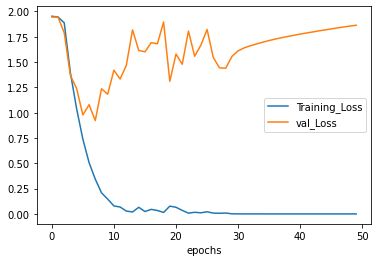

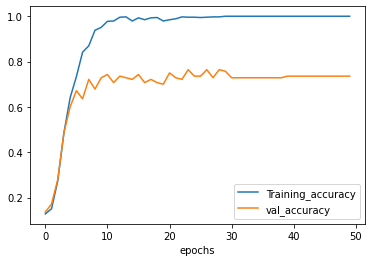

In [ ]:
plot_loss_curves(history_1)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_size= 64
#Rescale
train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale= 1/255.)

#load data from directories

train_data = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(IMG_size,IMG_size),
                                                 batch_size=32,
                                                 class_mode="categorical",
                                               color_mode= "grayscale",
                                               shuffle= True)

test_data = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(IMG_size,IMG_size),
                                                 batch_size=32,
                                                 class_mode="categorical",
                                             color_mode= "grayscale")

Found 716 images belonging to 7 classes.
Found 144 images belonging to 7 classes.


In [ ]:
model_2= Sequential([
    Conv2D(64,3, activation="relu",input_shape=(IMG_size,IMG_size,1)),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_2.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_2=model_2.fit(
    train_data,
    epochs=33,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/33
23/23 [==============================] - 10s 312ms/step - loss: 1.9511 - accuracy: 0.1433 - val_loss: 1.9453 - val_accuracy: 0.1429
Epoch 2/33
23/23 [==============================] - 6s 278ms/step - loss: 1.9428 - accuracy: 0.1531 - val_loss: 1.9640 - val_accuracy: 0.2143
Epoch 3/33
23/23 [==============================] - 6s 278ms/step - loss: 1.9328 - accuracy: 0.2303 - val_loss: 1.8509 - val_accuracy: 0.3786
Epoch 4/33
23/23 [==============================] - 6s 278ms/step - loss: 1.4090 - accuracy: 0.5056 - val_loss: 1.0482 - val_accuracy: 0.6357
Epoch 5/33
23/23 [==============================] - 6s 279ms/step - loss: 0.8403 - accuracy: 0.6868 - val_loss: 1.1863 - val_accuracy: 0.6429
Epoch 6/33
23/23 [==============================] - 6s 278ms/step - loss: 0.6195 - accuracy: 0.7879 - val_loss: 0.8823 - val_accuracy: 0.7000
Epoch 7/33
23/23 [==============================] - 6s 279ms/step - loss: 0.3456 - accuracy: 0.8975 - val_loss: 0.9243 - val_accuracy: 0.7571
Epoch

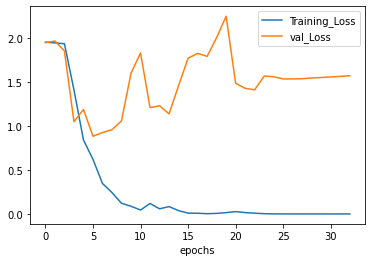

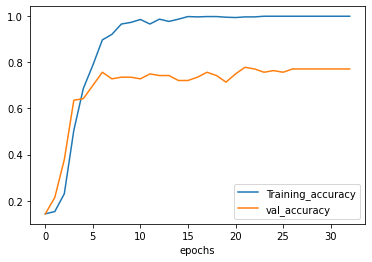

In [ ]:
plot_loss_curves(history_2)

### Learning Rate Change Validation loss too much

In [ ]:
model_3= Sequential([
    Conv2D(64,3, activation="relu",input_shape=(IMG_size,IMG_size,1)),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_3.compile(loss= "categorical_crossentropy",
                optimizer=Adam(lr=0.00115),
                metrics=["accuracy"],
                )

#fit the model
history_3=model_3.fit(
    train_data,
    epochs=33,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/33
23/23 [==============================] - 8s 300ms/step - loss: 1.9496 - accuracy: 0.1292 - val_loss: 1.9458 - val_accuracy: 0.1429
Epoch 2/33
23/23 [==============================] - 6s 274ms/step - loss: 1.9472 - accuracy: 0.1306 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 3/33
23/23 [==============================] - 6s 275ms/step - loss: 1.9448 - accuracy: 0.1461 - val_loss: 1.9398 - val_accuracy: 0.1857
Epoch 4/33
23/23 [==============================] - 6s 277ms/step - loss: 1.8445 - accuracy: 0.2823 - val_loss: 1.7887 - val_accuracy: 0.2857
Epoch 5/33
23/23 [==============================] - 6s 277ms/step - loss: 1.4247 - accuracy: 0.4691 - val_loss: 1.3335 - val_accuracy: 0.4929
Epoch 6/33
23/23 [==============================] - 6s 276ms/step - loss: 0.9390 - accuracy: 0.6404 - val_loss: 1.1912 - val_accuracy: 0.6143
Epoch 7/33
23/23 [==============================] - 6s 278ms/step - loss: 0.6613 - accuracy: 0.7584 - val_loss: 1.1706 - val_accuracy: 0.6214
Epoch 

### Adam doing his work problem is not learning Rate
* Simmplfy the model

In [ ]:
model_3= Sequential([
    Conv2D(10,3, activation="relu",input_shape=(IMG_size,IMG_size,1)),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(7, activation="softmax")
])
#Compile the model

model_3.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_3=model_3.fit(
    train_data,
    epochs=33,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/33
23/23 [==============================] - 6s 114ms/step - loss: 1.9492 - accuracy: 0.1222 - val_loss: 1.9458 - val_accuracy: 0.1429
Epoch 2/33
23/23 [==============================] - 2s 93ms/step - loss: 1.9458 - accuracy: 0.1531 - val_loss: 1.9450 - val_accuracy: 0.2500
Epoch 3/33
23/23 [==============================] - 2s 95ms/step - loss: 1.9244 - accuracy: 0.2219 - val_loss: 1.8422 - val_accuracy: 0.2571
Epoch 4/33
23/23 [==============================] - 2s 96ms/step - loss: 1.5278 - accuracy: 0.4242 - val_loss: 1.4081 - val_accuracy: 0.4929
Epoch 5/33
23/23 [==============================] - 2s 95ms/step - loss: 1.0254 - accuracy: 0.6180 - val_loss: 0.9729 - val_accuracy: 0.6786
Epoch 6/33
23/23 [==============================] - 2s 95ms/step - loss: 0.7132 - accuracy: 0.7402 - val_loss: 0.9321 - val_accuracy: 0.6714
Epoch 7/33
23/23 [==============================] - 2s 95ms/step - loss: 0.5450 - accuracy: 0.8202 - val_loss: 0.8662 - val_accuracy: 0.7000
Epoch 8/33
2

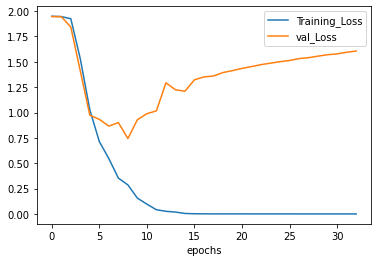

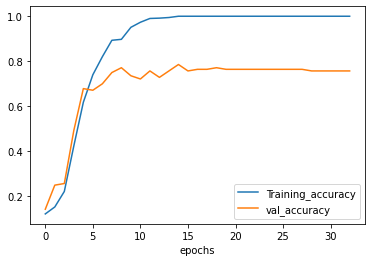

In [ ]:
plot_loss_curves(history_3)

* Still not good we can increase layer number

In [ ]:
model_4= Sequential([
    Conv2D(10,3, activation="relu",input_shape=(IMG_size,IMG_size,1)),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_4.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_4=model_4.fit(
    train_data,
    epochs=33,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/33
23/23 [==============================] - 5s 152ms/step - loss: 1.9467 - accuracy: 0.1447 - val_loss: 1.9462 - val_accuracy: 0.1429
Epoch 2/33
23/23 [==============================] - 3s 110ms/step - loss: 1.9460 - accuracy: 0.1447 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 3/33
23/23 [==============================] - 2s 86ms/step - loss: 1.9460 - accuracy: 0.1362 - val_loss: 1.9458 - val_accuracy: 0.1429
Epoch 4/33
23/23 [==============================] - 2s 86ms/step - loss: 1.9461 - accuracy: 0.1419 - val_loss: 1.9457 - val_accuracy: 0.1357
Epoch 5/33
23/23 [==============================] - 2s 86ms/step - loss: 1.9457 - accuracy: 0.1433 - val_loss: 1.9454 - val_accuracy: 0.1500
Epoch 6/33
23/23 [==============================] - 2s 90ms/step - loss: 1.9459 - accuracy: 0.1404 - val_loss: 1.9452 - val_accuracy: 0.1429
Epoch 7/33
23/23 [==============================] - 2s 88ms/step - loss: 1.9442 - accuracy: 0.1447 - val_loss: 1.9405 - val_accuracy: 0.1429
Epoch 8/33


### Is the problem Dense Layer ?

In [ ]:
model_5= Sequential([
    Conv2D(10,3, activation="relu",input_shape=(IMG_size,IMG_size,1)),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(7, activation="softmax")
])
#Compile the model

model_5.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_5=model_5.fit(
    train_data,
    epochs=33,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/33
23/23 [==============================] - 4s 116ms/step - loss: 1.9465 - accuracy: 0.1433 - val_loss: 1.9458 - val_accuracy: 0.1714
Epoch 2/33
23/23 [==============================] - 2s 85ms/step - loss: 1.9468 - accuracy: 0.1461 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 3/33
23/23 [==============================] - 2s 87ms/step - loss: 1.9464 - accuracy: 0.1376 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 4/33
23/23 [==============================] - 2s 85ms/step - loss: 1.9456 - accuracy: 0.1587 - val_loss: 1.9454 - val_accuracy: 0.1429
Epoch 5/33
23/23 [==============================] - 2s 84ms/step - loss: 1.9445 - accuracy: 0.1713 - val_loss: 1.9437 - val_accuracy: 0.1500
Epoch 6/33
23/23 [==============================] - 2s 84ms/step - loss: 1.9386 - accuracy: 0.1573 - val_loss: 1.9271 - val_accuracy: 0.1429
Epoch 7/33
23/23 [==============================] - 2s 87ms/step - loss: 1.9146 - accuracy: 0.1615 - val_loss: 1.8933 - val_accuracy: 0.2000
Epoch 8/33
2

### Dense Layer is not a problem/ Lets Make System More complex

In [ ]:
model_5= Sequential([
    Conv2D(10,3, activation="relu",input_shape=(IMG_size,IMG_size,1)),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
   Conv2D(10,3, activation="relu"),
   Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_5.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_5=model_5.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/100
23/23 [==============================] - 5s 121ms/step - loss: 1.9462 - accuracy: 0.1306 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 2/100
23/23 [==============================] - 2s 95ms/step - loss: 1.9461 - accuracy: 0.1404 - val_loss: 1.9457 - val_accuracy: 0.1429
Epoch 3/100
23/23 [==============================] - 2s 96ms/step - loss: 1.9455 - accuracy: 0.1404 - val_loss: 1.9440 - val_accuracy: 0.1429
Epoch 4/100
23/23 [==============================] - 2s 94ms/step - loss: 1.9410 - accuracy: 0.1433 - val_loss: 1.9325 - val_accuracy: 0.1429
Epoch 5/100
23/23 [==============================] - 2s 94ms/step - loss: 1.9149 - accuracy: 0.1952 - val_loss: 1.8983 - val_accuracy: 0.2643
Epoch 6/100
23/23 [==============================] - 2s 94ms/step - loss: 1.8148 - accuracy: 0.2640 - val_loss: 1.7874 - val_accuracy: 0.3071
Epoch 7/100
23/23 [==============================] - 2s 96ms/step - loss: 1.7244 - accuracy: 0.3539 - val_loss: 1.7986 - val_accuracy: 0.2571
Epoch

### Letse change Our model

In [ ]:
model_6= Sequential([
    Conv2D(32,3, activation="relu",input_shape=(IMG_size,IMG_size,1)),
    MaxPool2D(),
   Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_6.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_6=model_6.fit(
    train_data,
    epochs=60,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data))

Epoch 1/60
23/23 [==============================] - 5s 121ms/step - loss: 1.9477 - accuracy: 0.1236 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 2/60
23/23 [==============================] - 2s 92ms/step - loss: 1.9466 - accuracy: 0.1433 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 3/60
23/23 [==============================] - 2s 98ms/step - loss: 1.9470 - accuracy: 0.1292 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 4/60
23/23 [==============================] - 2s 94ms/step - loss: 1.9463 - accuracy: 0.1320 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 5/60
23/23 [==============================] - 2s 93ms/step - loss: 1.9463 - accuracy: 0.1250 - val_loss: 1.9461 - val_accuracy: 0.1429
Epoch 6/60
23/23 [==============================] - 2s 93ms/step - loss: 1.9466 - accuracy: 0.1334 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 7/60
23/23 [==============================] - 2s 94ms/step - loss: 1.9466 - accuracy: 0.1447 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 8/60
2

### Model 2 is our king lets improve it

In [ ]:
model_7= Sequential([
    Conv2D(64,3, activation="relu",input_shape=(IMG_size,IMG_size,1)),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_7.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_7=model_7.fit(
    train_data,
    epochs=33,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/33
23/23 [==============================] - 17s 377ms/step - loss: 1.9492 - accuracy: 0.1304 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 2/33
23/23 [==============================] - 6s 280ms/step - loss: 1.9464 - accuracy: 0.1346 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 3/33
23/23 [==============================] - 6s 278ms/step - loss: 1.9465 - accuracy: 0.1360 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 4/33
23/23 [==============================] - 6s 278ms/step - loss: 1.9464 - accuracy: 0.1388 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 5/33
23/23 [==============================] - 6s 279ms/step - loss: 1.9464 - accuracy: 0.1445 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 6/33
23/23 [==============================] - 6s 280ms/step - loss: 1.9461 - accuracy: 0.1332 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 7/33
23/23 [==============================] - 6s 279ms/step - loss: 1.9461 - accuracy: 0.1445 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch

### Adding more layers just not work

In [ ]:
model_7= Sequential([
    Conv2D(32,3, activation="relu",input_shape=(IMG_size,IMG_size,1)),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_7.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_7=model_7.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/100
23/23 [==============================] - 11s 328ms/step - loss: 1.9565 - accuracy: 0.1332 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 2/100
23/23 [==============================] - 6s 237ms/step - loss: 1.9466 - accuracy: 0.1388 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 3/100
23/23 [==============================] - 5s 233ms/step - loss: 1.9461 - accuracy: 0.1318 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 4/100
23/23 [==============================] - 5s 213ms/step - loss: 1.9460 - accuracy: 0.1234 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 5/100
23/23 [==============================] - 5s 217ms/step - loss: 1.9461 - accuracy: 0.1360 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 6/100
23/23 [==============================] - 5s 213ms/step - loss: 1.9456 - accuracy: 0.1445 - val_loss: 1.9436 - val_accuracy: 0.1286
Epoch 7/100
23/23 [==============================] - 5s 215ms/step - loss: 1.9315 - accuracy: 0.2272 - val_loss: 1.8665 - val_accuracy: 0.314

### Increase Filter Number 

In [ ]:
model_7= Sequential([
    Conv2D(64,3, activation="relu",input_shape=(IMG_size,IMG_size,1)),
    Conv2D(64,3, activation="relu"),
    MaxPool2D(),
    Conv2D(64,3, activation="relu"),
    Conv2D(64,3, activation="relu"),
    MaxPool2D(),
    Conv2D(64,3, activation="tanh"),
    Conv2D(64,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_7.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_7=model_7.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/100
23/23 [==============================] - 28s 544ms/step - loss: 1.9516 - accuracy: 0.1264 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 2/100
23/23 [==============================] - 9s 390ms/step - loss: 1.9462 - accuracy: 0.1376 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 3/100
23/23 [==============================] - 9s 390ms/step - loss: 1.9461 - accuracy: 0.1236 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 4/100
23/23 [==============================] - 9s 389ms/step - loss: 1.9461 - accuracy: 0.1208 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 5/100
23/23 [==============================] - 9s 402ms/step - loss: 1.9460 - accuracy: 0.1194 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 6/100
23/23 [==============================] - 9s 392ms/step - loss: 1.9461 - accuracy: 0.1236 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 7/100
23/23 [==============================] - 9s 391ms/step - loss: 1.9461 - accuracy: 0.1404 - val_loss: 1.9459 - val_accuracy: 0.142

### Filter Size 64 seems Not cool/

In [ ]:
model_8= Sequential([
    Conv2D(32,3, activation="relu",input_shape=(IMG_size,IMG_size,1)),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(50, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_8.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_8=model_8.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/45
23/23 [==============================] - 7s 226ms/step - loss: 1.9482 - accuracy: 0.1404 - val_loss: 1.9435 - val_accuracy: 0.1643
Epoch 2/45
23/23 [==============================] - 5s 202ms/step - loss: 1.9040 - accuracy: 0.1854 - val_loss: 1.7540 - val_accuracy: 0.2929
Epoch 3/45
23/23 [==============================] - 5s 203ms/step - loss: 1.4817 - accuracy: 0.4368 - val_loss: 1.2759 - val_accuracy: 0.5571
Epoch 4/45
23/23 [==============================] - 5s 216ms/step - loss: 0.9387 - accuracy: 0.6685 - val_loss: 1.0518 - val_accuracy: 0.6286
Epoch 5/45
23/23 [==============================] - 5s 203ms/step - loss: 0.7125 - accuracy: 0.7570 - val_loss: 0.8776 - val_accuracy: 0.7000
Epoch 6/45
23/23 [==============================] - 5s 204ms/step - loss: 0.4721 - accuracy: 0.8385 - val_loss: 0.8681 - val_accuracy: 0.7143
Epoch 7/45
23/23 [==============================] - 5s 217ms/step - loss: 0.3430 - accuracy: 0.8890 - val_loss: 0.9058 - val_accuracy: 0.7286
Epoch 

### Can model_8 BE OUR LEADER ?

In [ ]:
test_datagen_1=ImageDataGenerator(rescale=1/255.)

#Load our image data from directories
test_data_1= test_datagen_1.flow_from_directory(directory= test_dir,
                                              target_size=(IMG_size,IMG_size),
                                              class_mode= "categorical",
                                              color_mode="grayscale",
                                              batch_size= 140)
images,labels= test_data_1.next()
print(labels.shape)

Found 144 images belonging to 7 classes.
(140, 7)


In [ ]:
data_prob=model_8.predict(images)
preds=data_prob.argmax(axis=1)

In [ ]:
class_names_1= ['angry', 'disgust', 'fear', 'happy', 'neutral',
               'sad', 'surprised']
real=labels.argmax(axis=1)

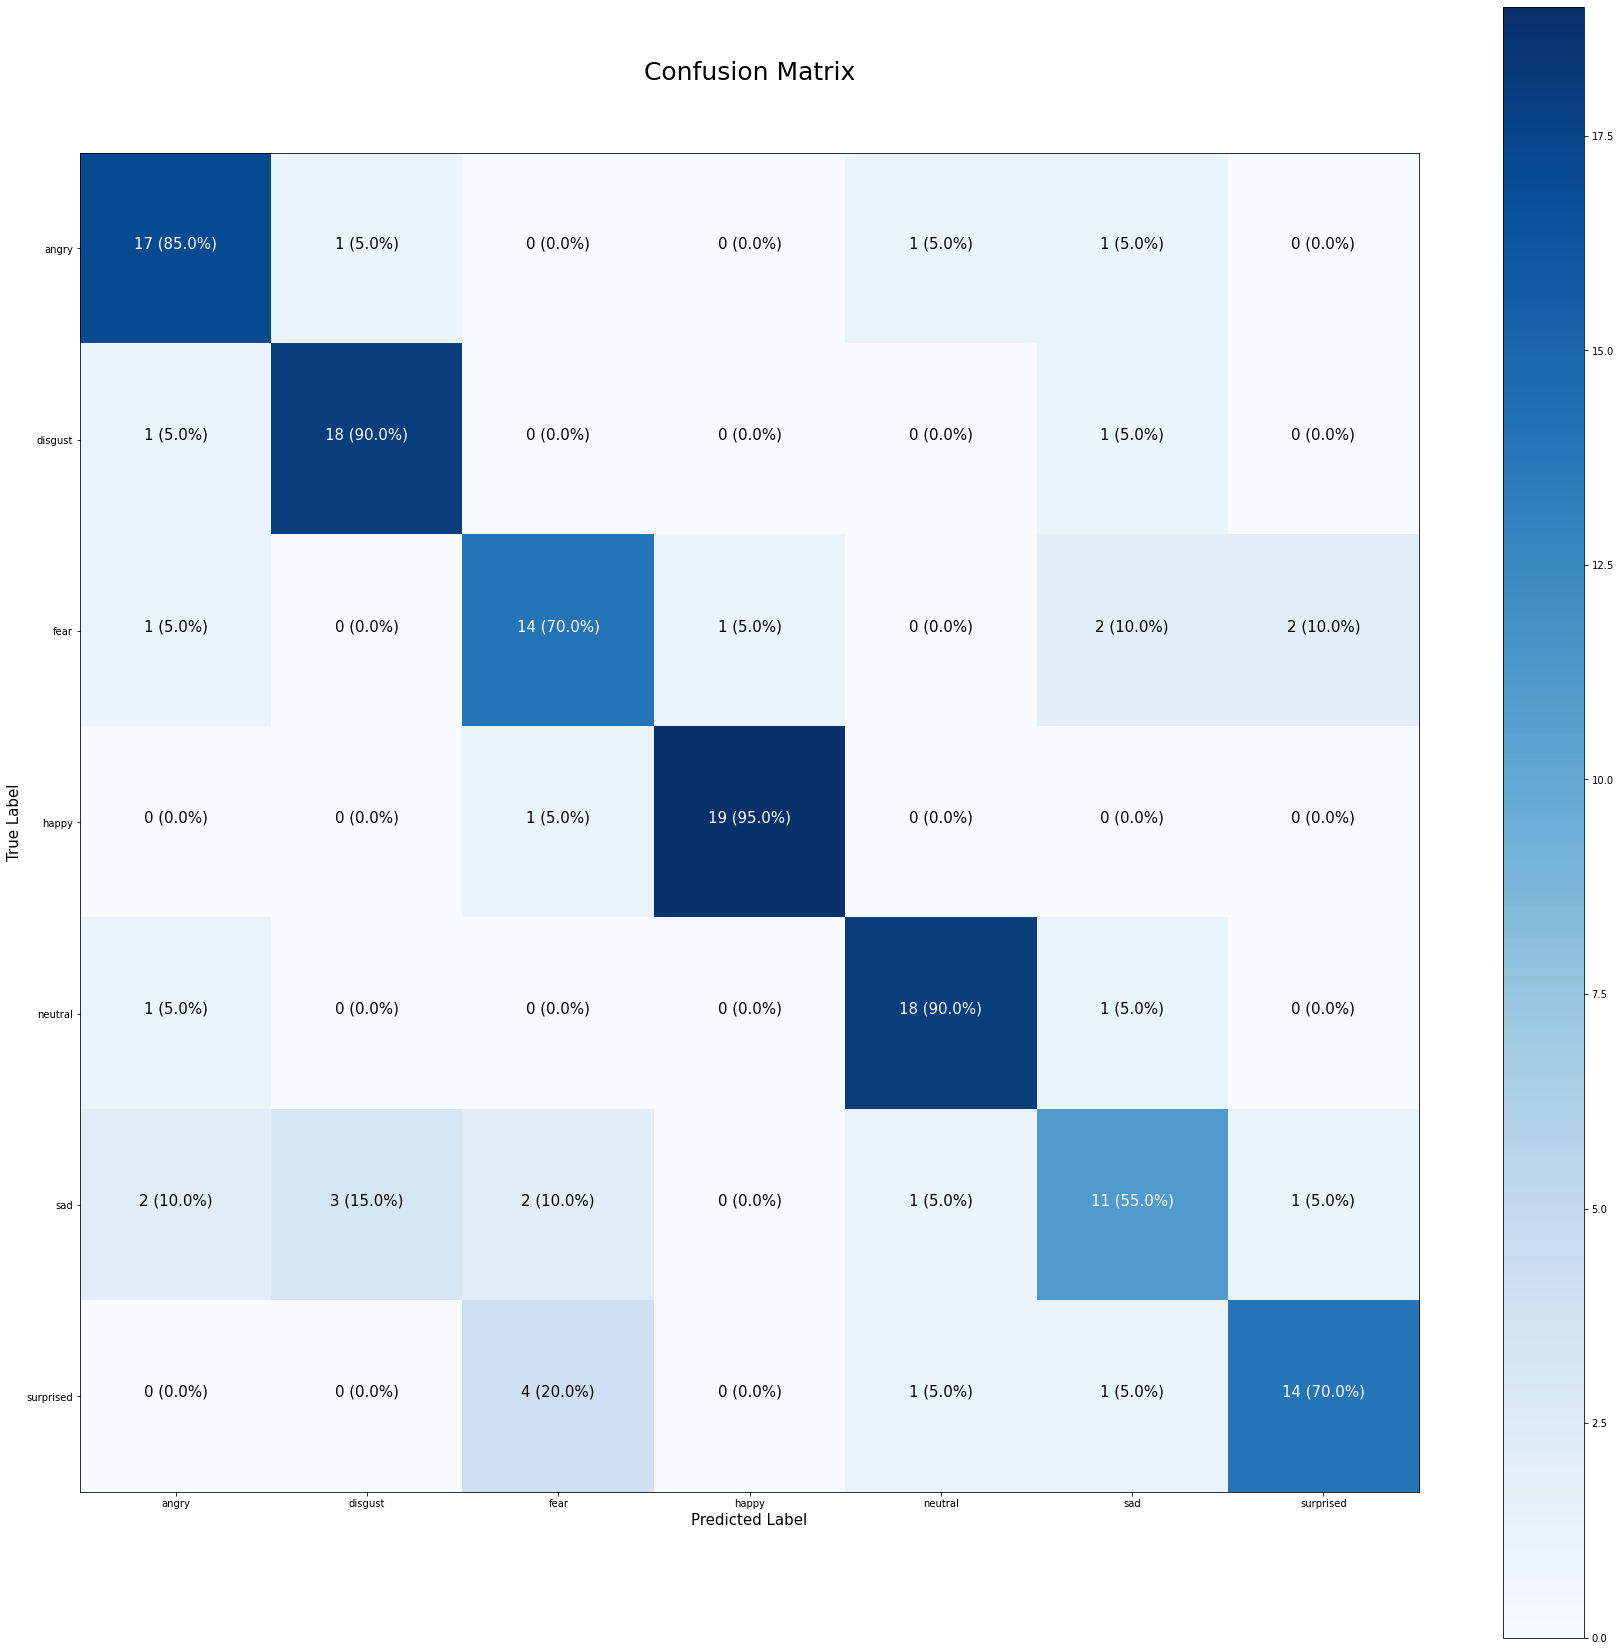

In [ ]:
PrettyConfusionMatrix(y_true= real,
                      y_pred= preds,
                      classes=class_names_1,
                      figsize=(30,30),
                      text_size=15)

In [ ]:
model_9= Sequential([
    Conv2D(32,2, activation="relu",input_shape=(IMG_size,IMG_size,1)),
    Conv2D(32,2, activation="relu"),
    MaxPool2D(),
    Conv2D(32,2, activation="relu"),
    Conv2D(32,2, activation="relu"),
    MaxPool2D(),
    Conv2D(32,2, activation="relu"),
    Conv2D(32,2, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(50, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_9.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_9=model_9.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/100
23/23 [==============================] - 12s 319ms/step - loss: 1.9493 - accuracy: 0.1419 - val_loss: 1.9476 - val_accuracy: 0.1929
Epoch 2/100
23/23 [==============================] - 5s 231ms/step - loss: 1.9312 - accuracy: 0.1671 - val_loss: 1.9019 - val_accuracy: 0.2571
Epoch 3/100
23/23 [==============================] - 6s 235ms/step - loss: 1.7196 - accuracy: 0.3357 - val_loss: 1.7788 - val_accuracy: 0.3214
Epoch 4/100
23/23 [==============================] - 5s 211ms/step - loss: 1.1802 - accuracy: 0.5772 - val_loss: 1.4178 - val_accuracy: 0.5429
Epoch 5/100
23/23 [==============================] - 5s 210ms/step - loss: 0.9122 - accuracy: 0.6531 - val_loss: 1.2984 - val_accuracy: 0.5714
Epoch 6/100
23/23 [==============================] - 5s 211ms/step - loss: 0.6600 - accuracy: 0.7879 - val_loss: 0.9895 - val_accuracy: 0.6571
Epoch 7/100
23/23 [==============================] - 4s 193ms/step - loss: 0.5109 - accuracy: 0.8132 - val_loss: 1.0077 - val_accuracy: 0.692

### Rearrange our image size
240 to 64

The king

In [ ]:
model_10= Sequential([
    Conv2D(32,3, activation="relu",input_shape=(IMG_size,IMG_size,1)),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(50, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_10.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_10=model_10.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/100
23/23 [==============================] - 16s 585ms/step - loss: 1.9473 - accuracy: 0.1334 - val_loss: 1.9458 - val_accuracy: 0.1429
Epoch 2/100
23/23 [==============================] - 9s 376ms/step - loss: 1.9466 - accuracy: 0.1208 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 3/100
23/23 [==============================] - 10s 418ms/step - loss: 1.9461 - accuracy: 0.1601 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 4/100
23/23 [==============================] - 9s 377ms/step - loss: 1.9462 - accuracy: 0.1447 - val_loss: 1.9458 - val_accuracy: 0.1429
Epoch 5/100
23/23 [==============================] - 9s 380ms/step - loss: 1.9458 - accuracy: 0.1194 - val_loss: 1.9452 - val_accuracy: 0.1429
Epoch 6/100
23/23 [==============================] - 9s 377ms/step - loss: 1.9429 - accuracy: 0.1573 - val_loss: 1.9266 - val_accuracy: 0.1714
Epoch 7/100
23/23 [==============================] - 9s 380ms/step - loss: 1.7724 - accuracy: 0.2753 - val_loss: 1.6260 - val_accuracy: 0.34

KeyboardInterrupt: ignored

### 64 pixel seems cool

In [ ]:
model_11= Sequential([
    Conv2D(32,2, activation="relu",input_shape=(IMG_size,IMG_size,1)),
    Conv2D(32,2, activation="relu"),
    MaxPool2D(),
    Conv2D(32,2, activation="relu"),
    Conv2D(32,2, activation="relu"),
    MaxPool2D(),
    Conv2D(32,2, activation="relu"),
    Conv2D(32,2, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(50, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_11.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_11=model_11.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/100
23/23 [==============================] - 4s 103ms/step - loss: 1.9474 - accuracy: 0.1306 - val_loss: 1.9458 - val_accuracy: 0.1357
Epoch 2/100
23/23 [==============================] - 1s 47ms/step - loss: 1.9465 - accuracy: 0.1362 - val_loss: 1.9456 - val_accuracy: 0.1429
Epoch 3/100
23/23 [==============================] - 1s 46ms/step - loss: 1.9458 - accuracy: 0.1573 - val_loss: 1.9447 - val_accuracy: 0.1429
Epoch 4/100
23/23 [==============================] - 1s 46ms/step - loss: 1.9347 - accuracy: 0.2402 - val_loss: 1.9084 - val_accuracy: 0.2643
Epoch 5/100
23/23 [==============================] - 1s 46ms/step - loss: 1.7459 - accuracy: 0.3497 - val_loss: 1.6529 - val_accuracy: 0.2929
Epoch 6/100
23/23 [==============================] - 1s 47ms/step - loss: 1.3221 - accuracy: 0.4817 - val_loss: 1.5731 - val_accuracy: 0.3357
Epoch 7/100
23/23 [==============================] - 1s 46ms/step - loss: 1.1643 - accuracy: 0.5660 - val_loss: 1.2442 - val_accuracy: 0.5357
Epoch

In [ ]:
model_12= Sequential([
    Conv2D(32,3, activation="relu",input_shape=(IMG_size,IMG_size,1)),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(64,3, activation="relu"),
    Conv2D(64,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_12.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_12=model_12.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/100
23/23 [==============================] - 4s 96ms/step - loss: 1.9474 - accuracy: 0.1419 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 2/100
23/23 [==============================] - 2s 68ms/step - loss: 1.9464 - accuracy: 0.1419 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 3/100
23/23 [==============================] - 1s 45ms/step - loss: 1.9462 - accuracy: 0.1208 - val_loss: 1.9459 - val_accuracy: 0.1714
Epoch 4/100
23/23 [==============================] - 1s 45ms/step - loss: 1.9471 - accuracy: 0.1362 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 5/100
23/23 [==============================] - 1s 47ms/step - loss: 1.9461 - accuracy: 0.1390 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 6/100
23/23 [==============================] - 1s 45ms/step - loss: 1.9461 - accuracy: 0.1390 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 7/100
23/23 [==============================] - 1s 45ms/step - loss: 1.9460 - accuracy: 0.1447 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 

In [ ]:
model_13= Sequential([
    Conv2D(32,3, activation="relu",input_shape=(IMG_size,IMG_size,1)),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(16,3, activation="relu"),
    Conv2D(16,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(32, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_13.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_13=model_13.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/100
23/23 [==============================] - 4s 88ms/step - loss: 1.9474 - accuracy: 0.1278 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 2/100
23/23 [==============================] - 2s 64ms/step - loss: 1.9461 - accuracy: 0.1461 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 3/100
23/23 [==============================] - 1s 42ms/step - loss: 1.9463 - accuracy: 0.1433 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 4/100
23/23 [==============================] - 1s 43ms/step - loss: 1.9465 - accuracy: 0.1447 - val_loss: 1.9457 - val_accuracy: 0.1500
Epoch 5/100
23/23 [==============================] - 1s 43ms/step - loss: 1.9452 - accuracy: 0.1545 - val_loss: 1.9438 - val_accuracy: 0.2000
Epoch 6/100
23/23 [==============================] - 1s 43ms/step - loss: 1.9363 - accuracy: 0.1924 - val_loss: 1.9320 - val_accuracy: 0.1429
Epoch 7/100
23/23 [==============================] - 1s 43ms/step - loss: 1.8342 - accuracy: 0.2598 - val_loss: 1.6978 - val_accuracy: 0.3571
Epoch 

In [ ]:
model_13= Sequential([
    Conv2D(32,3, activation="relu",input_shape=(IMG_size,IMG_size,1)),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(16,3, activation="relu"),
    Conv2D(16,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(32, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_13.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_13=model_13.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

### 86 % with model 14

In [ ]:
model_14= Sequential([
    Conv2D(filters=32, kernel_size=(5,5), activation="relu",input_shape=(IMG_size,IMG_size,1)),
    BatchNormalization(name='batchnorm_1'),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="tanh"),
    MaxPool2D(),
    Flatten(),
    Dense(40, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_14.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_14=model_14.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/100
23/23 [==============================] - 4s 69ms/step - loss: 1.9369 - accuracy: 0.1620 - val_loss: 1.9440 - val_accuracy: 0.1875
Epoch 2/100
23/23 [==============================] - 1s 43ms/step - loss: 1.6606 - accuracy: 0.3757 - val_loss: 1.9174 - val_accuracy: 0.2153
Epoch 3/100
23/23 [==============================] - 1s 43ms/step - loss: 1.1823 - accuracy: 0.5531 - val_loss: 1.8586 - val_accuracy: 0.3056
Epoch 4/100
23/23 [==============================] - 2s 68ms/step - loss: 0.9441 - accuracy: 0.6355 - val_loss: 1.8465 - val_accuracy: 0.2153
Epoch 5/100
23/23 [==============================] - 1s 46ms/step - loss: 0.7535 - accuracy: 0.7318 - val_loss: 1.7061 - val_accuracy: 0.5139
Epoch 6/100
23/23 [==============================] - 1s 44ms/step - loss: 0.6263 - accuracy: 0.7877 - val_loss: 1.6900 - val_accuracy: 0.4444
Epoch 7/100
23/23 [==============================] - 1s 46ms/step - loss: 0.5345 - accuracy: 0.8101 - val_loss: 1.5139 - val_accuracy: 0.6042
Epoch 

In [ ]:
loaded_model_14.save("faceDetectedImages_model_14.h5")

In [ ]:
loaded_model_14=tf.keras.models.load_model("faceDetectedImages_model_14")

In [ ]:
data_prob=model_14.predict(images)
preds=data_prob.argmax(axis=1)

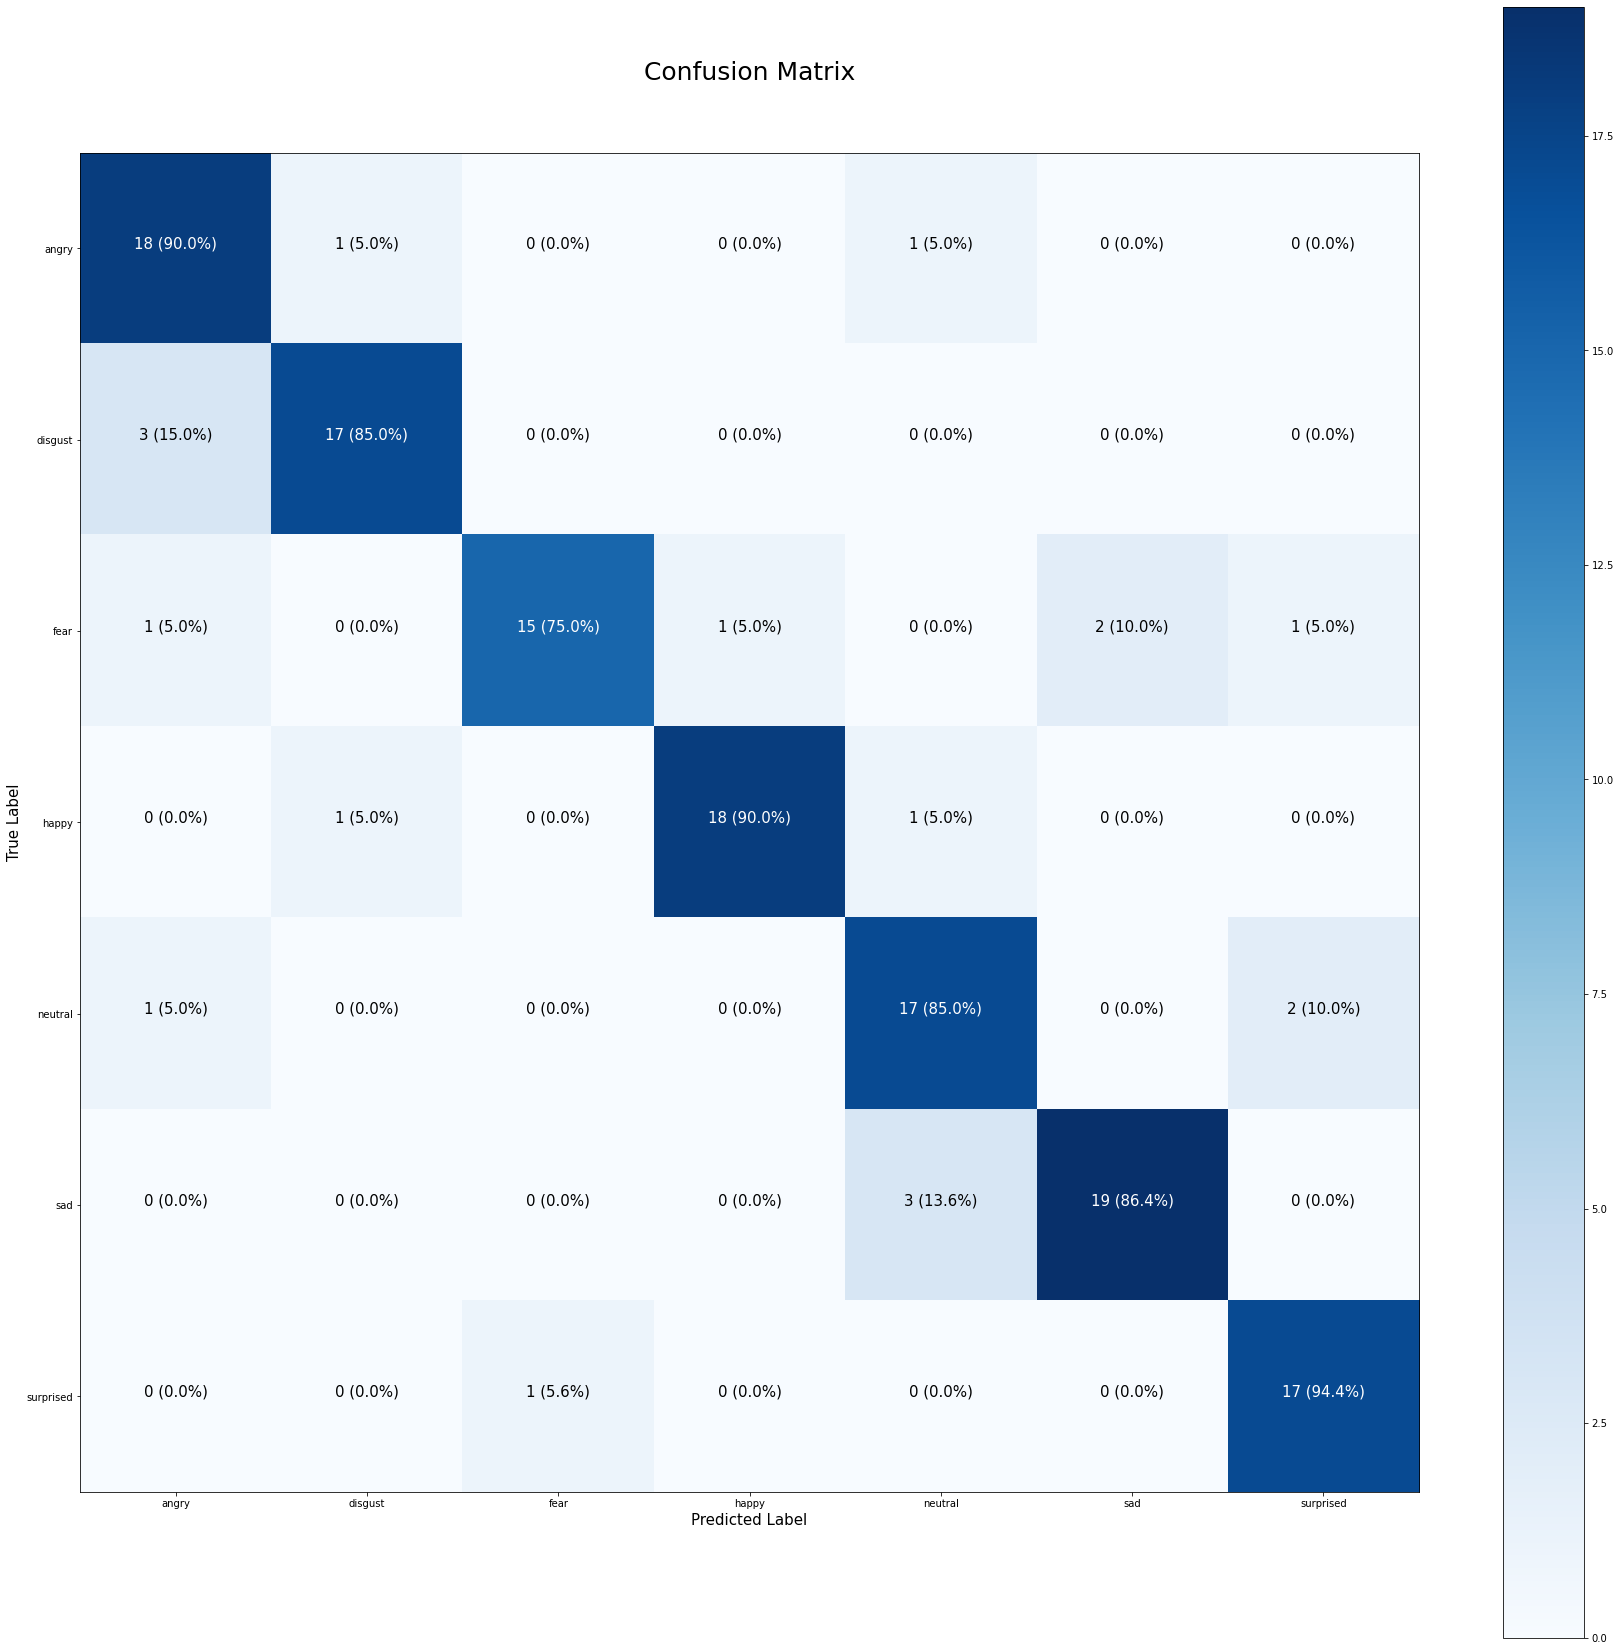

In [ ]:
PrettyConfusionMatrix(y_true= real,
                      y_pred= preds,
                      classes=class_names_1,
                      figsize=(30,30),
                      text_size=15)

In [ ]:
import shutil
shutil.make_archive("faceDetectedImages_model_17", 'zip', "/content/faceDetectedImages_model_17")

'/content/faceDetectedImages_model_17.zip'

In [ ]:
model_15= Sequential([
    Conv2D(32,3, activation="relu",input_shape=(IMG_size,IMG_size,1)),
    BatchNormalization(name='batchnorm_1'),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(50, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_15.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_15=model_15.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/100
23/23 [==============================] - 31s 1s/step - loss: 1.9731 - accuracy: 0.1657 - val_loss: 1.9443 - val_accuracy: 0.1357
Epoch 2/100
23/23 [==============================] - 28s 1s/step - loss: 1.6408 - accuracy: 0.3596 - val_loss: 1.9474 - val_accuracy: 0.1429
Epoch 3/100
23/23 [==============================] - 28s 1s/step - loss: 1.3235 - accuracy: 0.4789 - val_loss: 1.9326 - val_accuracy: 0.1571
Epoch 4/100
23/23 [==============================] - 29s 1s/step - loss: 1.2179 - accuracy: 0.5295 - val_loss: 1.9478 - val_accuracy: 0.1429
Epoch 5/100
23/23 [==============================] - 29s 1s/step - loss: 0.9758 - accuracy: 0.6419 - val_loss: 1.9449 - val_accuracy: 0.1929
Epoch 6/100
23/23 [==============================] - 29s 1s/step - loss: 0.7914 - accuracy: 0.7261 - val_loss: 1.9496 - val_accuracy: 0.1571
Epoch 7/100
23/23 [==============================] - 28s 1s/step - loss: 0.6371 - accuracy: 0.7654 - val_loss: 1.9574 - val_accuracy: 0.1429
Epoch 8/100
2

KeyboardInterrupt: ignored

In [ ]:
model_14= Sequential([
    Conv2D(filters=32, kernel_size=(5,5), activation="relu",input_shape=(IMG_size,IMG_size,1)),
    BatchNormalization(name='batchnorm_1'),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(16,3, activation="relu"),
    Conv2D(16,3, activation="tanh"),
    MaxPool2D(),
    Conv2D(16,3, activation="relu"),
    Conv2D(16,3, activation="tanh"),
    MaxPool2D(),
    Flatten(),
    Dense(40, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_14.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_14=model_14.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

NameError: ignored

TypeError: ignored

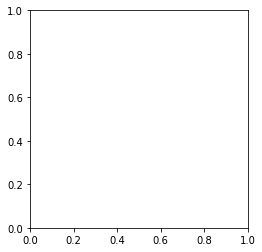

In [ ]:
pred_and_plot(model=model_14, filename="/content/eva-toker-sadface.jpg", class_names=class_names_1)

In [ ]:
pred_0

array([[6.66158646e-02, 2.38656634e-04, 1.01877935e-01, 4.47370082e-01,
        1.60490036e-01, 2.98331608e-03, 2.20424131e-01]], dtype=float32)

In [ ]:
model_16= Sequential([
    Conv2D(filters=16, kernel_size=(5,5), activation="relu",input_shape=(IMG_size,IMG_size,1)),
    BatchNormalization(name='batchnorm_1'),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(40, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_16.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_16=model_16.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )


Epoch 1/100
23/23 [==============================] - 4s 96ms/step - loss: 1.9517 - accuracy: 0.1494 - val_loss: 1.9460 - val_accuracy: 0.1389
Epoch 2/100
23/23 [==============================] - 2s 70ms/step - loss: 1.9422 - accuracy: 0.1564 - val_loss: 1.9456 - val_accuracy: 0.1528
Epoch 3/100
23/23 [==============================] - 1s 47ms/step - loss: 1.9143 - accuracy: 0.1802 - val_loss: 1.9379 - val_accuracy: 0.3194
Epoch 4/100
23/23 [==============================] - 1s 44ms/step - loss: 1.6770 - accuracy: 0.3254 - val_loss: 1.8873 - val_accuracy: 0.4097
Epoch 5/100
23/23 [==============================] - 1s 46ms/step - loss: 1.3760 - accuracy: 0.4832 - val_loss: 1.8443 - val_accuracy: 0.4444
Epoch 6/100
23/23 [==============================] - 1s 42ms/step - loss: 1.1292 - accuracy: 0.5894 - val_loss: 1.8412 - val_accuracy: 0.4931
Epoch 7/100
23/23 [==============================] - 1s 44ms/step - loss: 0.9327 - accuracy: 0.6732 - val_loss: 1.8152 - val_accuracy: 0.4931
Epoch 

In [ ]:
model_17= Sequential([
    Conv2D(filters=32, kernel_size=(5,5), activation="relu",input_shape=(IMG_size,IMG_size,1)),
    BatchNormalization(name='batchnorm_1'),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(16,3, activation="relu"),
    Conv2D(16,5, activation="relu"),
    BatchNormalization(name='batchnorm_2'),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(40, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_17.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_17=model_17.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )


Epoch 1/100
23/23 [==============================] - 39s 2s/step - loss: 1.9660 - accuracy: 0.1648 - val_loss: 1.9479 - val_accuracy: 0.1389
Epoch 2/100
23/23 [==============================] - 1s 48ms/step - loss: 1.7998 - accuracy: 0.2668 - val_loss: 1.9452 - val_accuracy: 0.1528
Epoch 3/100
23/23 [==============================] - 1s 48ms/step - loss: 1.5322 - accuracy: 0.4204 - val_loss: 1.9449 - val_accuracy: 0.1389
Epoch 4/100
23/23 [==============================] - 1s 47ms/step - loss: 1.2013 - accuracy: 0.5824 - val_loss: 1.9704 - val_accuracy: 0.1667
Epoch 5/100
23/23 [==============================] - 1s 47ms/step - loss: 1.0189 - accuracy: 0.6327 - val_loss: 2.0365 - val_accuracy: 0.1389
Epoch 6/100
23/23 [==============================] - 1s 45ms/step - loss: 0.8323 - accuracy: 0.7151 - val_loss: 2.0704 - val_accuracy: 0.1667
Epoch 7/100
23/23 [==============================] - 1s 46ms/step - loss: 0.6531 - accuracy: 0.7542 - val_loss: 2.1819 - val_accuracy: 0.1389
Epoch 8

In [ ]:
model_18= Sequential([
    Conv2D(filters=32, kernel_size=(5,5), activation="relu",input_shape=(IMG_size,IMG_size,1)),
    BatchNormalization(name='batchnorm_1'),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,5, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="tanh"),
    Conv2D(10,5, activation="tanh"),
    BatchNormalization(name='batchnorm_2'),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(40, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_18.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_18=model_18.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/100
23/23 [==============================] - 5s 103ms/step - loss: 1.9571 - accuracy: 0.1369 - val_loss: 1.9459 - val_accuracy: 0.1389
Epoch 2/100
23/23 [==============================] - 1s 45ms/step - loss: 1.6847 - accuracy: 0.3324 - val_loss: 1.9489 - val_accuracy: 0.1389
Epoch 3/100
23/23 [==============================] - 1s 47ms/step - loss: 1.2727 - accuracy: 0.5237 - val_loss: 1.9524 - val_accuracy: 0.1250
Epoch 4/100
23/23 [==============================] - 1s 46ms/step - loss: 1.0243 - accuracy: 0.6075 - val_loss: 1.9754 - val_accuracy: 0.1389
Epoch 5/100
23/23 [==============================] - 1s 46ms/step - loss: 0.9690 - accuracy: 0.6271 - val_loss: 1.9368 - val_accuracy: 0.1667
Epoch 6/100
23/23 [==============================] - 1s 46ms/step - loss: 0.7924 - accuracy: 0.7095 - val_loss: 1.9391 - val_accuracy: 0.1111
Epoch 7/100
23/23 [==============================] - 1s 46ms/step - loss: 0.6544 - accuracy: 0.7402 - val_loss: 1.9292 - val_accuracy: 0.1667
Epoch

In [ ]:
import zipfile
zip_ref= zipfile.ZipFile("faceDetectedImages_model.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
IMAGE_SHAPE= 64
#Rescale
datagen= ImageDataGenerator(rescale=1./255,validation_split=0.6)
Data_dir = "/content/faceDetectedImages"

train_data = datagen.flow_from_directory(Data_dir,
                                                 target_size=(64,64),
                                                 batch_size=32,
                                                 class_mode="categorical",
                                               color_mode= "rgb",
                                               subset='training')

test_data = datagen.flow_from_directory(Data_dir,
                                        target_size=(64,64),
                                        batch_size=32,
                                        class_mode="categorical",
                                        color_mode= "rgb",
                                        subset='validation')


Found 343 images belonging to 7 classes.
Found 509 images belonging to 7 classes.


In [ ]:
model_14= Sequential([
    Conv2D(filters=10, kernel_size=(5,5), activation="relu",input_shape=(64,64,3)),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    AveragePooling2D(),
    Conv2D(20,3, activation="relu"),
    AveragePooling2D(),
    Flatten(),
    Dense(10, activation="relu"),
    Dense(10, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_14.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_14=model_14.fit(
    train_data,
    epochs=20,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/20
15/15 [==============================] - 5s 288ms/step - loss: 1.9464 - accuracy: 0.1254 - val_loss: 1.9456 - val_accuracy: 0.1434
Epoch 2/20
15/15 [==============================] - 4s 269ms/step - loss: 1.9453 - accuracy: 0.1458 - val_loss: 1.9447 - val_accuracy: 0.1434
Epoch 3/20
15/15 [==============================] - 3s 187ms/step - loss: 1.9443 - accuracy: 0.1633 - val_loss: 1.9442 - val_accuracy: 0.1434
Epoch 4/20
15/15 [==============================] - 3s 188ms/step - loss: 1.9431 - accuracy: 0.1545 - val_loss: 1.9414 - val_accuracy: 0.1473
Epoch 5/20
15/15 [==============================] - 3s 189ms/step - loss: 1.9371 - accuracy: 0.1487 - val_loss: 1.9357 - val_accuracy: 0.1434
Epoch 6/20
15/15 [==============================] - 3s 187ms/step - loss: 1.9292 - accuracy: 0.1866 - val_loss: 1.9267 - val_accuracy: 0.1729
Epoch 7/20
15/15 [==============================] - 3s 189ms/step - loss: 1.9173 - accuracy: 0.2012 - val_loss: 1.9107 - val_accuracy: 0.2200
Epoch 

In [ ]:
model_14.save("deneme1.h5")

In [ ]:
images,labels=test_data.next()

In [ ]:
model_14.predict(tf.expand_dims(images[1],axis=0))

array([[8.8945974e-08, 8.5417764e-14, 7.7317077e-09, 5.2731256e-03,
        9.9470633e-01, 2.0491638e-05, 1.5365921e-09]], dtype=float32)